In [1]:
import math
from matplotlib import pyplot as plt
import numpy as np
import random


# Feel free to import other packages, if needed.
# As long as they are supported by CSL machines.


# takes a filename and returns the data as
# described below in an n-by-(m+1) array
def get_dataset(filename):
    """
    TODO: implement this function.

    INPUT: 
        filename - a string representing the path to the csv file.

    RETURNS:
        An n by m+1 array, where n is # data points and m is # features.
        The labels y should be in the first column.
    """
    dataset = []
    # read from csv file, cut string with ","
    dataset = np.genfromtxt(filename, delimiter = ",", skip_header = 1, encoding = "utf-8")
    # delete the "header" in csv file, leave with only data in the dataset
    dataset = np.delete(dataset, 0, 1)
    return dataset

In [2]:
get_dataset('bodyfat.csv')

array([[12.6   ,  1.0708, 23.    , ..., 32.    , 27.4   , 17.1   ],
       [ 6.9   ,  1.0853, 22.    , ..., 30.5   , 28.9   , 18.2   ],
       [24.6   ,  1.0414, 22.    , ..., 28.8   , 25.2   , 16.6   ],
       ...,
       [28.3   ,  1.0328, 72.    , ..., 31.3   , 27.2   , 18.    ],
       [25.3   ,  1.0399, 72.    , ..., 30.5   , 29.4   , 19.8   ],
       [30.7   ,  1.0271, 74.    , ..., 33.7   , 30.    , 20.9   ]])

In [3]:
dataset = get_dataset('bodyfat.csv')
dataset.shape

(252, 16)

---------------------------------- Print_Stats ------------------------------

In [4]:
def print_stats(dataset, col):
    """
    TODO: implement this function.

    INPUT: 
        dataset - the body fat n by m+1 array
        col     - the index of feature to summarize on. 
                  For example, 1 refers to density.

    RETURNS:
        None
    """
    # print:
    # 1. Num of data points
    # 2. sample mean
    # 3. sample sd.
    num_of_data = len(dataset)
    sample_mean = 0
    sample_sd = 0

    # calculate sample mean. x_bar = 1/n (sigma i = 1 ~ n) xi
    for i in dataset:
        sample_mean += i[col]

    sample_mean = 1 / num_of_data * sample_mean

    # calculate sample sd. sd = sqrt(1/(n-1) * sum(1 ~ n)(x_i - x_bar)^2))
    for i in dataset:
        sample_sd += (i[col] - sample_mean) ** 2

    sample_sd = (1 / (num_of_data - 1) * sample_sd) ** 0.5

    # print out all 3 data
    print(num_of_data)
    print('{:.2f}'.format(sample_mean))
    print('{:.2f}'.format(sample_sd))

In [5]:
data = get_dataset('bodyfat.csv')
print_stats(dataset, 1)  # summary of density

252
1.06
0.02


------------------------------------ regression ---------------------------------

In [6]:
def regression(dataset, cols, betas):
    """
    TODO: implement this function.

    INPUT: 
        dataset - the body fat n by m+1 array
        cols    - a list of feature indices to learn.
                  For example, [1,8] refers to density and abdomen.
        betas   - a list of elements chosen from [beta0, beta1, ..., betam]

    RETURNS:
        mse of the regression model
    """
    num_of_data = len(dataset)
    mse = 0

    # formula: f(x) = beta_0 + beta_1 * x_i_1 + ... + beta_m * x_i_m
    for i in dataset:
        f_x = betas[0]  # beta_0
        x_index = 0  

        # perform beta_m * x_i_m
        for beta_index in range(1, len(betas)):
            f_x += betas[beta_index] * i[cols[x_index]]
            x_index += 1

        # Fprmula of mse = 1 / n * (f(x) - y_i) ^ 2
        # step #1: calculate (f(x) - y_i) ^ 2
        mse += math.pow((f_x - i[0]), 2)

    # Step #2: mse = 1 / n * step #1
    mse = 1 / num_of_data * mse
    return mse


In [7]:
regression(dataset, cols=[2, 3], betas=[0, 0, 0])

418.50384920634906

In [8]:
regression(dataset, cols=[2, 3, 4], betas=[0, -1.1, -.2, 3])

11859.174086111105

----------------------------------gradient_descent-------------------------------

In [9]:
def gradient_descent(dataset, cols, betas):
    """
    TODO: implement this function.

    INPUT: 
        dataset - the body fat n by m+1 array
        cols    - a list of feature indices to learn.
                  For example, [1,8] refers to density and abdomen.
        betas   - a list of elements chosen from [beta0, beta1, ..., betam]

    RETURNS:
        An 1D array of gradients
    """
    grads = []
    num_of_data = len(dataset)

    # formula: f(x) = beta_0 + beta_1 * x_i_1 + ... + beta_m * x_i_m
    for x in range(len(betas)):
        temp = 0
        sum_gd = 0
        for i in dataset:
            # step #1, set f(x) = beta_0
            f_x = betas[0]
            x_index = 0

            # step #2, f(x) += beta_m * x_i_m
            for j in range(1, len(betas)):
                f_x += betas[j] * i[cols[x_index]]
                x_index += 1

            if x == 0:
                # CASE #1: x = 0, no need to multiply x_i
                temp += f_x - i[0]
            elif x != 0:
                # CASE #2: x != 0, step #2 * x_i
                temp = (f_x - i[0]) * i[cols[x - 1]]
                sum_gd += temp
        # calculate final result according to 2 cases relatively
        if x == 0:
            sum_gd = 2 / num_of_data * temp 
        elif x != 0:
            sum_gd = 2 / num_of_data * sum_gd 

        grads.append(sum_gd)

    # transform array to a numpy array
    grads = np.asarray(grads)
    return grads

In [10]:
gradient_descent(dataset, cols=[2, 3], betas=[0, 0, 0])

array([  -37.87698413, -1756.37222222, -7055.35138889])

------------------------------iterate_gradient-----------------------------------

In [11]:
def iterate_gradient(dataset, cols, betas, T, eta):
    """
    TODO: implement this function.

    INPUT: 
        dataset - the body fat n by m+1 array
        cols    - a list of feature indices to learn.
                  For example, [1,8] refers to density and abdomen.
        betas   - a list of elements chosen from [beta0, beta1, ..., betam]
        T       - # iterations to run
        eta     - learning rate

    RETURNS:
        None
    """

    for curr_T in range(1, T + 1):
        # PRINT #1: current iteration number, T
        print(curr_T, end = " ")

        gd = gradient_descent(dataset, cols, betas)
        for i in range(len(betas)):
            # formula: beta_k_^(t) = beta_k_^(t-1) - eta(gradient_descenent)
            betas[i] -= eta * gd[i]

        # PRINT #2: current mse, mse
        curr_mse = regression(dataset, cols, betas)
        print('{:.2f}'.format(curr_mse), end = " ")

        # PRINT #3 & 4: current beta & all other betas, beta0, beta1, ... betam
        for curr_beta in betas:
            print('{:.2f}'.format(curr_beta), end = " ")
        # next line
        print()

In [12]:
iterate_gradient(dataset, cols=[1, 8], betas=[400, -400, 300], T=10, eta=1e-4)

1 423085332.40 394.45 -405.84 -220.18 
2 229744495.73 398.54 -401.54 163.14 
3 124756241.68 395.53 -404.71 -119.33 
4 67745350.04 397.75 -402.37 88.82 
5 36787203.39 396.11 -404.09 -64.57 
6 19976260.50 397.32 -402.82 48.47 
7 10847555.07 396.43 -403.76 -34.83 
8 5890470.68 397.09 -403.07 26.55 
9 3198666.69 396.60 -403.58 -18.68 
10 1736958.93 396.96 -403.20 14.65 


---------------------------------compute_betas-----------------------------------

In [13]:
def compute_betas(dataset, cols):
    """
    TODO: implement this function.

    INPUT: 
        dataset - the body fat n by m+1 array
        cols    - a list of feature indices to learn.
                  For example, [1,8] refers to density and abdomen.

    RETURNS:
        A tuple containing corresponding mse and several learned betas
    """
    # β^ = (X_T * X)^ −1 * X_T * y
    # X: n*m matrix def by param
    # y: body fat
    betas = ()
    mse = 0
    X = []
    y = []

    # iterate
    for x in range(len(dataset)):
        y.append(dataset[x][0])
        temp = []
        temp.append(1)
        for col in cols:
            temp.append(dataset[x][col])
        X.append(temp)

    # transform X to array type
    X = np.asarray(X)
    X_T = X.T  # transpose X

    # calculate beta hat by formula: β^ = (X_T * X)^ −1 * X_T * y
    betas = np.dot(np.dot(np.linalg.inv(np.dot(X_T, X)), X_T), y)

    mse = regression(dataset, cols, betas)
    return (mse, *betas)


In [14]:
compute_betas(dataset, cols=[1, 2])


(1.402939560014441,
 441.35259435922495,
 -400.59549536855883,
 0.009892204826346125)

------------------------------------predict--------------------------------------

In [15]:
def predict(dataset, cols, features):
    """
    TODO: implement this function.
    INPUT: 
        dataset - the body fat n by m+1 array
        cols    - a list of feature indices to learn.
                  For example, [1,8] refers to density and abdomen.
        features- a list of observed values
    RETURNS:
        The predicted body fat percentage value
    """

    betas = compute_betas(dataset, cols)
    prediction = betas[1]
    
    for i in range(len(cols)):
        prediction += betas[i + 2] * features[i]
    
    return prediction

In [16]:
predict(dataset, cols=[1, 2], features=[1.0708, 23])

12.622458629578128

-------------------------------Synthetic_datasets--------------------------------

In [17]:
def synthetic_datasets(betas, alphas, X, sigma):
    """
    TODO: implement this function.

    Input:
        betas  - parameters of the linear model
        alphas - parameters of the quadratic model
        X      - the input array (shape is guaranteed to be (n,1))
        sigma  - standard deviation of noise

    RETURNS:
        Two datasets of shape (n,2) - linear one first, followed by quadratic.
    """
    # n * 2 array
    linear = []  
    quadratic = []

    for i in range(len(X)):
        # fill the linear array
        # yi = β0 + β1xi + zi, zi∼N(0,σ)
        y_i_linear = betas[0] + betas[1] * X[i][0] +\
             np.random.normal(loc = 0.0, scale = sigma)
        linear.append([y_i_linear, X[i][0]])

        # fill the quadratic array
        # yi = α0 + α1xi^2 + zi, zi∼N(0, σ)
        y_i_quadratic = alphas[0] + alphas[1] * ((X[i][0]) ** 2) +\
             np.random.normal(loc = 0.0, scale = sigma)
        quadratic.append([y_i_quadratic, X[i][0]])

    linear = np.asarray(linear)
    quadratic = np.asarray(quadratic)

    return linear, quadratic

In [18]:
synthetic_datasets(np.array([0, 2]), np.array([0, 1]), np.array([[4]]), 1)

(array([[7.47234351, 4.        ]]), array([[17.00235722,  4.        ]]))

----------------------------compare_and_plot-------------------------------------

In [19]:
def plot_mse():
    from sys import argv
    if len(argv) == 2 and argv[1] == 'csl':
        import matplotlib
        matplotlib.use('Agg')

    # TODO: Generate datasets and plot an MSE-sigma graph
    # STEP #1: Create an input array X containing 1000 numbers
    # within range [-100, 100].
    X = []
    for i in range(1000):
        X.append([random.randint(-100, 100)])

    # STEP #2: Create couples of betas and alphas with non-zero values
    couple_alphas = [1, 2, 3, 4]
    couple_betas = [4, 3, 2, 1]

    # STEP #3: Set sigmas to be 10^−4,10^−3,…,1,10,…,10^5
    sigmas = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5]

    # STEP #4: Under each settings of sigmas, generate two synthetic datasets
    synthetic_datasets_set = []
    for sigma in sigmas:
        synthetic_datasets_set.append(synthetic_datasets(
            couple_betas, couple_alphas, X, sigma))

    # STEP #5: Fit both datasets using compute_betas(), obtain the corresponding MSEs
    linear_mse = []
    quadratic_mse = []
    for i in range(len(synthetic_datasets_set)):
        linear_mse.append(compute_betas(
            synthetic_datasets_set[i][0], cols=[1])[0])
        quadratic_mse.append(compute_betas(
            synthetic_datasets_set[i][1], cols=[1])[0])

    # STEP #6: Plot a figure showing how MSE changes while sigma is increasing
    # should use the plotting format -o
    plt.plot(sigmas, linear_mse, "-o")
    plt.plot(sigmas, quadratic_mse, "-o")

    # both axes log scale
    plt.xscale("log")
    plt.yscale("log")

    # label x-y axis
    plt.xlabel("Different Setting of Sigmas / σ")
    plt.ylabel("MSE of Trained Model")

    # make a legend
    plt.legend(["linear dataset", "quadratic dataset"])

    # Save the figure as mse.pdf. Do NOT display it
    plt.savefig("mse.pdf", format="pdf")

-------------------------- Main function --------------------------------

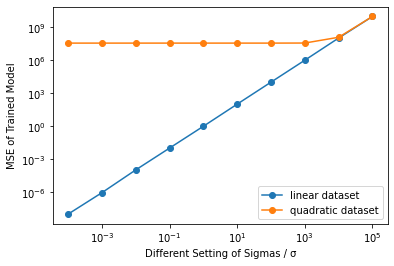

In [20]:
if __name__ == '__main__':
    ### DO NOT CHANGE THIS SECTION ###
    plot_mse()
